## This notebook has 2 parts. 
## First, we build our KNN model from scratch, and see how K affects the result. 
## Second, we use sklearn built-in KNN model and cross-validation to find the best K.

## KNN

## Load the iris dataset from sklearn

In [1]:
# Use Iris dataset as an example.
from sklearn import datasets

iris = datasets.load_iris()
print('# of samples:',iris.data.shape[0])
print('# of features:',iris.data.shape[1])
print('There are 3 kinds of iris, which is our target value: ', iris.target_names)

# of samples: 150
# of features: 4
There are 3 kinds of iris, which is our target value:  ['setosa' 'versicolor' 'virginica']


## Extract each feature

In [2]:
X = iris.data
y = iris.target

# Extract each feature to f1~f4
f1 = X[:,0]
f2 = X[:,1]
f3 = X[:,2]
f4 = X[:,3]

## Visualize each pair of features

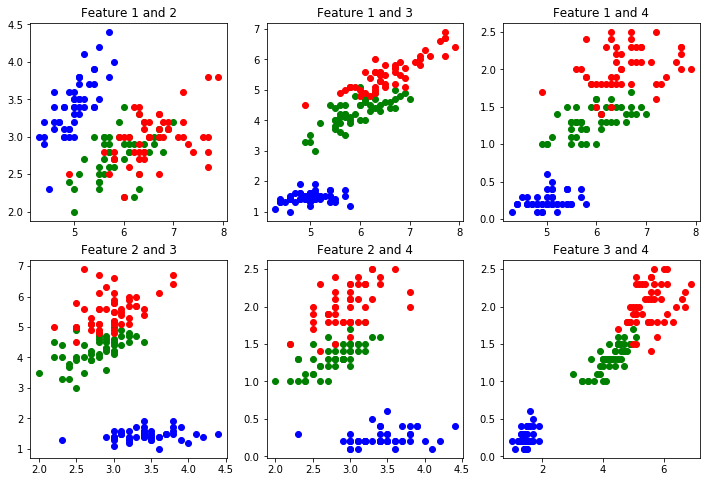

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

colors = ['b','g','r']
f,ax = plt.subplots(2,3,figsize=(12,8))
ax[0][0].set_title('Feature 1 and 2')
ax[0][1].set_title('Feature 1 and 3')
ax[0][2].set_title('Feature 1 and 4')
ax[1][0].set_title('Feature 2 and 3')
ax[1][1].set_title('Feature 2 and 4')
ax[1][2].set_title('Feature 3 and 4')

for c in np.unique(y):
    ax[0][0].plot(f1[y==c],f2[y==c],'o',color=colors[int(c)])
    ax[0][1].plot(f1[y==c],f3[y==c],'o',color=colors[int(c)])
    ax[0][2].plot(f1[y==c],f4[y==c],'o',color=colors[int(c)])
    ax[1][0].plot(f2[y==c],f3[y==c],'o',color=colors[int(c)])
    ax[1][1].plot(f2[y==c],f4[y==c],'o',color=colors[int(c)])
    ax[1][2].plot(f3[y==c],f4[y==c],'o',color=colors[int(c)])

## Feature 1 and 2 have more overlap area. We test KNN on these two features since we want to see how K affect the result

In [4]:
X = X[:,0:2]

## Now build our KNN model
## 1. Calculate the distance
## 2. Find k closest neighbors
## 3. Vote for labels

In [5]:
def KNNModel(Xtr, Ytr, K, Xte):
    Xtr = np.asarray(Xtr)
    Ytr = np.asarray(Ytr)
    classes = list(np.unique(Ytr))
    
    mtr, ntr = np.asarray(Xtr).shape
    mte, nte = np.asarray(Xte).shape
    num_class = len(classes)
    Yte = np.tile(Ytr[0], (mte, 1)) 
    
    K = min(K, mtr)    # can't use more neighbors than training set
    
    for i in range(mte):    # for each sample
        # calculate the distance, we use Euclidean distance here
        dist = np.sum(np.power(Xtr - np.asarray(Xte)[i, :], 2), axis=1)
        # find K nearest neighbors
        K_nearest_idx = np.argsort(dist, axis=0)[0:K]
        sorted_dist = dist[K_nearest_idx]
        # count the number of each label
        count = np.zeros((num_class,))
        for c in range(num_class):
            count[c] = np.sum(Ytr[K_nearest_idx] == classes[c])
        c_max = np.argmax(count)
        Yte[i] = classes[c_max]
    return Yte

## Since there is no training step in KNN. We test it directly. 
## Split the data first

In [6]:
from sklearn.model_selection import train_test_split
Xtr,Xva,Ytr,Yva = train_test_split(X, y, test_size=0.2, random_state=10)

## Test the model. We visualize the decision boundary to see its result

In [7]:
from matplotlib.colors import ListedColormap

def plotResult(X, Y, k):
    nGrid=128
    axis = plt
    axis.plot( X[:,0],X[:,1], 'k.', visible=False )
    ax = axis.axis()
    xticks = np.linspace(ax[0],ax[1],nGrid)
    yticks = np.linspace(ax[2],ax[3],nGrid)
    grid = np.meshgrid( xticks, yticks )
    
    XGrid = np.column_stack( (grid[0].flatten(), grid[1].flatten()))
    YGrid = KNNModel(X, Y, k, XGrid)
    cmap = ListedColormap(['#0000FF', '#00FF00', '#FF0000'])
    cmap_light = ListedColormap(['#AAAAFF', '#AAFFAA', '#FFAAAA'])
    axis.imshow( YGrid.reshape( (len(xticks),len(yticks)) ), extent=ax, interpolation='nearest',origin='lower',alpha=0.5, aspect='auto', cmap=cmap_light )
    classes = np.unique(Y)
    cvals = (classes - min(classes))/(max(classes)-min(classes)+1e-100)
    for i, c in enumerate(classes):
        axis.title('K = ' + str(k))
        axis.plot( X[Y==c,0],X[Y==c,1], 'ko', color=cmap(cvals[i]))        

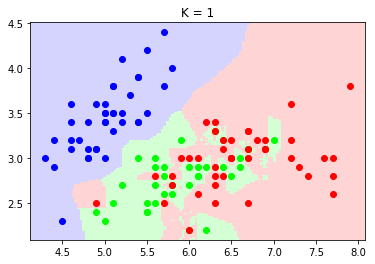

In [8]:
plotResult(Xtr, Ytr, k=1)

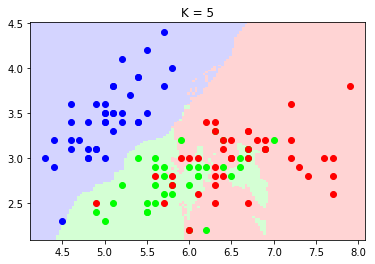

In [9]:
plotResult(Xtr, Ytr, k=5)

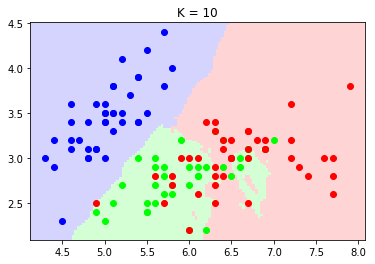

In [10]:
plotResult(Xtr, Ytr, k=10)

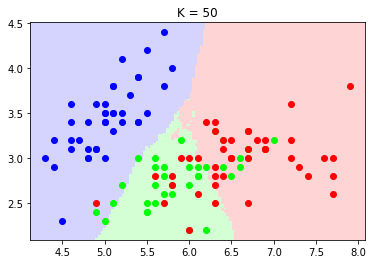

In [11]:
plotResult(Xtr, Ytr, k=50)

## Cross-validation

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [13]:
X = iris.data
y = iris.target

## Build the model from sklearn. Set K=10 first.

In [14]:
knn = KNeighborsClassifier(n_neighbors=10)

## Test the cross-validation. Set 5-fold and it will return the accuracy of each fold. We could average all accuracy and get the final accuracy.

In [15]:
scores = cross_val_score(knn,X,y,cv=5,scoring='accuracy')
print(scores)
print(scores.mean())

[0.96666667 1.         1.         0.93333333 1.        ]
0.9800000000000001


## Let's test which K is the best. Test K from 1 to 30 and set 10-fold here.

In [16]:
k_range = range(1,31)
k_scores = []
for k_number in k_range:
    knn = KNeighborsClassifier(n_neighbors=k_number)
    scores = cross_val_score(knn,X,y,cv=10,scoring='accuracy')
    k_scores.append(scores.mean())

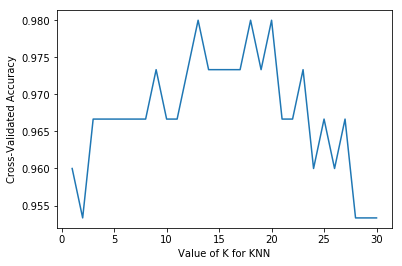

In [17]:
plt.plot(k_range,k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

## It seems that we could choose K around 13 or 20, which we'll get the highest cross-validation accuracy.